# Аналитика в авиакомпании
## Описание проекта

Цель проекта - понять предпочтения клиентов авиакомпании. Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

В качестве исходных данных представлены результаты выполнения двух запросов в БД авикомпании.

## Оглавление
* [1. Создание парсера](#h_1)
* [2. Открытие файла с данными и изучение общей информации](#h_2)
* [3. Расчет топ-10 городов по количеству рейсов](#h_3)
* [4. Построение графиков](#h_4)
* [5. Общие выводы](#h_5)

## Библиотеки и функции для работы с данными

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 1. Создание парсера<a class="anchor" id="h_1"></a>
Создадим парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года, сохраним данные в датафрейм festivals и выведим на экран.

In [4]:
URL = '...'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "best_festivals"})


headers = []
for heading in table.find_all('th'):
    headers.append(heading.text)

festivals = pd.DataFrame ([], columns = headers)

for row in soup.find_all('tr'):
     cells = row.find_all('td')
     if len(cells) > 0:
        festivals = festivals.append({'Название фестиваля': cells[0].text, 'Место проведения':cells[1].text, 'Дата проведения':cells[2].text}, ignore_index=True)
display(festivals)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## 2. Открытие файла с данными и изучение общей информации<a class="anchor" id="h_2"></a>

In [3]:
# Открытие файлов и создание датафреймов
models_stat = pd.read_csv('/datasets/query_1.csv')
cities_stat = pd.read_csv('/datasets/query_3.csv')

Посмотрим общую информацию о таблице с моделями самолетов:

In [4]:
models_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В таблице содержится всего 8 записей. Пропусков нет. Типы данных выглядят корректно.
Посмотрим подробнее данные:

In [5]:
models_stat

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Проблем также не видно, дублей нет.

Посмотрим общую информацию о таблице со статистикой по прибывающим рейсам в города:

In [6]:
cities_stat.info()
cities_stat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


В таблице содержится 101 запись, пропусков нет. Типы данных выглядят корректно. Дублей также в данных нет, поскольку в SQL-запросе записи группировались по разным городам.

## 3. Расчет топ-10 городов по количеству рейсов <a class="anchor" id="h_3"></a>
Выберем топ-10 городов по количеству рейсов:

In [7]:
cities_stat.sort_values(by=['average_flights'], ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


* Из таблицы видно, что Москва значительно выделяется по количеству рейсов, даже в сравнении с Санкт-Петербургом.
* В целом прослеживается следующая связь: чем больше в городе жителей, тем большее количеством рейсов в него совершается. Большинство из данной десятки - это города-миллионники. Но есть и исключения: города Сочи, Брянск, Ульяновск имеют население значительно  меньше ближайших соседей по числу совершаемых рейсов. При этом полетов в среднем в них совершается почти столько же. Брянск и Ульяновск - столицы регионов, поэтому в них совершается много рейсов несмотря на меньшее количество жителей. Сочи - курортный центр, а данные по количеству рейсов взяты как раз за август - самый разгар сезона отпусков. Возможно Сочи не оказался бы в десятке лидеров, если бы данные были взяты для месяц вне курортного сезона.

## 4. Построение графиков <a class="anchor" id="h_4"></a>
### Модели самолетов и количество рейсов

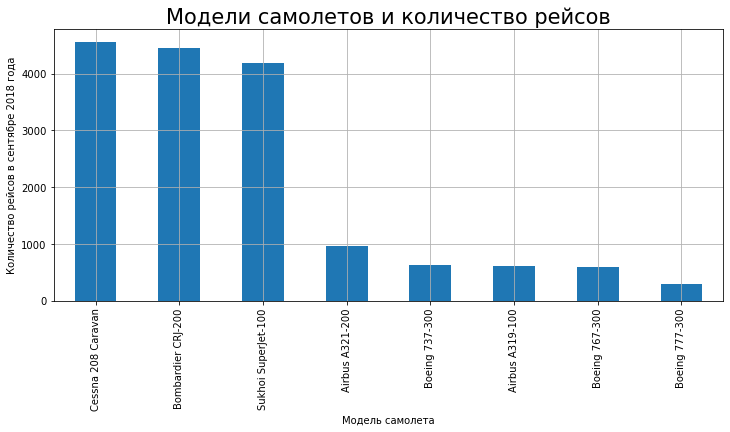

In [8]:
models_stat.sort_values(by=['flights_amount'], ascending = False).head(10).plot('model', 'flights_amount', kind='bar', grid=True, figsize=(12, 5), legend=False)
plt.title('Модели самолетов и количество рейсов', fontsize=21)
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов в сентябре 2018 года')
plt.show()

По данному графику видно, что большая часть рейсов авиакомпании «F9» в сентябре 2018 года осуществлялась 3 моделями самолетов:
* Cessna 208 Caravan
* Bombardier CRJ-200
* Sukhoi SuperJet-100

На основе этих данных можно сделать вывод, что именно эти самолеты составляют основу парка самолетов авиакомпании «F9».

Рассмотрим подробнее популярные модели самолетов
* Cessna 208 Caravan - перевозит максимум 9 пассажиров, дальность полета - 1200 км.  Длина разбега у данного самолета небольшая, поэтому он подходит для небольших аэродромов в отличие от других самолетов авикомпании. Скорее всего самолеты  данной модели осуществляют короткие полеты внутри одного региона. Поэтому они могут осуществлять рейсы с большей частотой. Если данное предположение верно, то самолетов данной модели у авикомпании меньше, чем Bombardier CRJ-200 и Sukhoi SuperJet-100, которые не могут осуществлять частые рейсы вследствие длительных перелетов.
* Bombardier CRJ-200 - перевозит максимум 50 пассажиров, дальность полета - 3000 км. Подходит для более дальних перелетов между регионами.
* Sukhoi SuperJet-100 - перевозит максимум 98 пассажиров, дальность полета - 3000 км. Также подходит для региональных перелетов.

### Города и количество рейсов

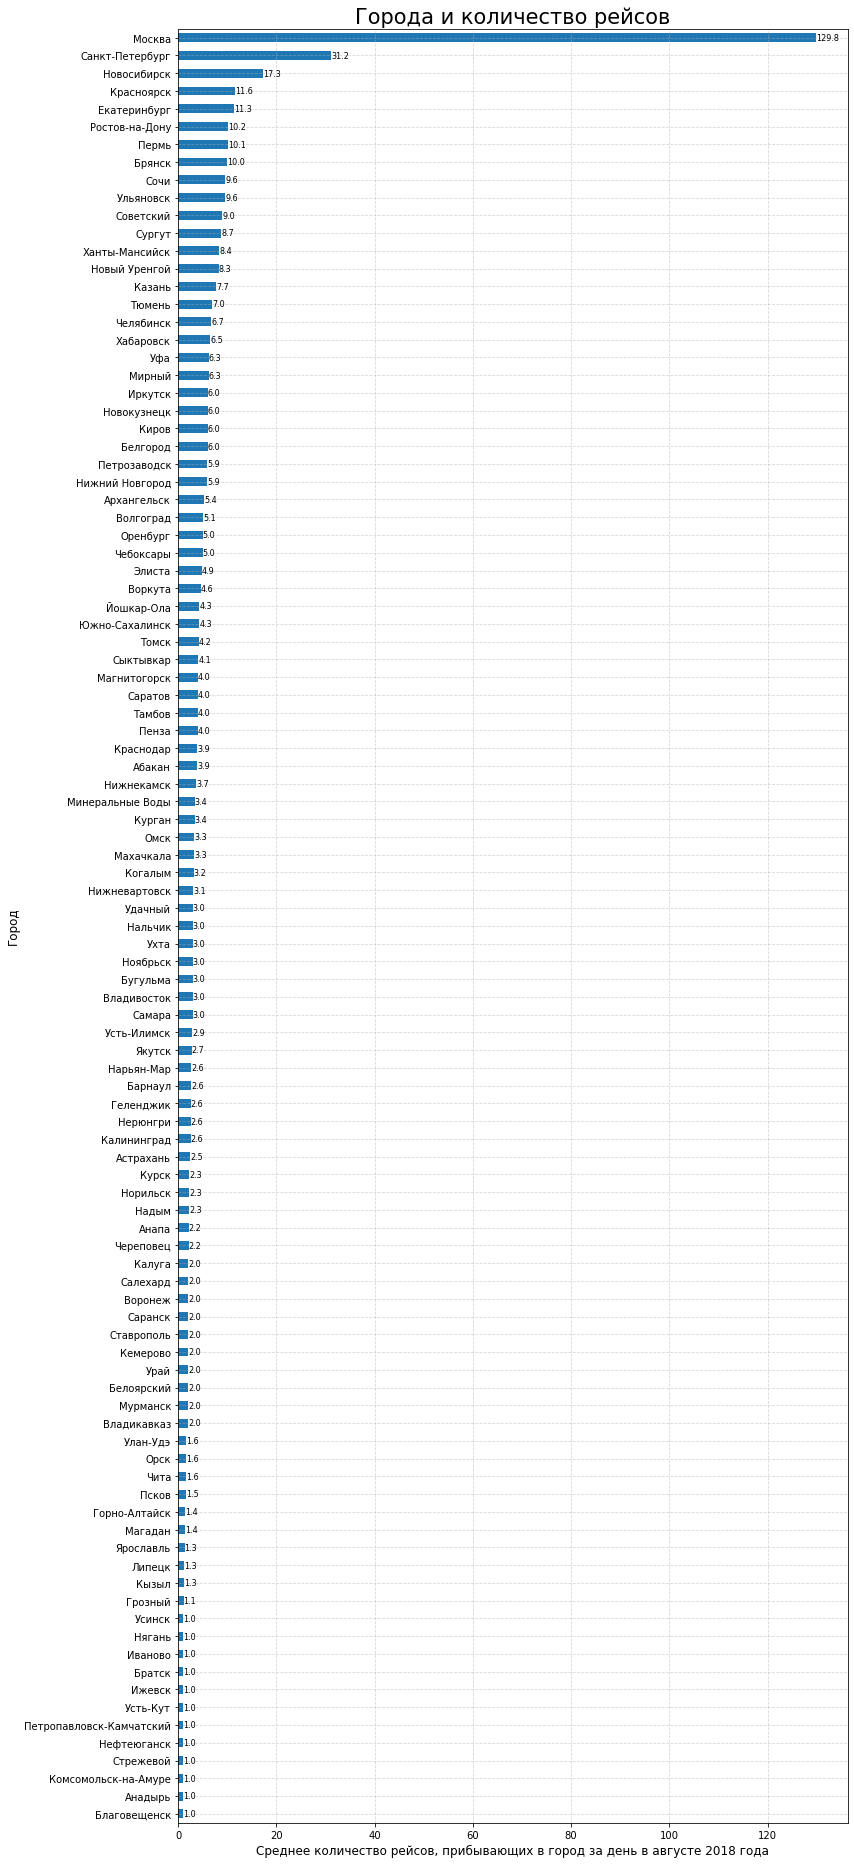

In [9]:
# Cортировка записей датафрейма
cities_stat.sort_values('average_flights', inplace=True)
cities_stat.reset_index(inplace=True)

# Построение горизонтальной диаграммы
cities_stat.plot('city', 'average_flights',kind='barh',figsize = (12,33), legend=False)

# Подписи
plt.title('Города и количество рейсов', fontsize=21)
plt.xlabel('Среднее количество рейсов, прибывающих в город за день в августе 2018 года', fontsize=12)
plt.ylabel('Город', fontsize=12)

# Сетка
plt.grid(linestyle='--', alpha=0.5)

# Добавление числовых значений среднего количества рейсов
for x, y, tex in zip(cities_stat.average_flights, cities_stat.index, cities_stat.average_flights):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='left', verticalalignment='center', fontdict={'color':'black','size':8})

# Вывод на экран
plt.show()

По данной диаграмме наглядно видно, что 
* авиакомпания «F9» осуществляет в основном рейсы между Москвой и другими городами России.
* минимальное среднее значение числа прибывающих рейсов равно 1. Это говорит скорее всего о том, что авиакомпания регулярно осуществляет во все представленные города минимум по одному рейсу в день.

### Топ-10 городов по количеству рейсов

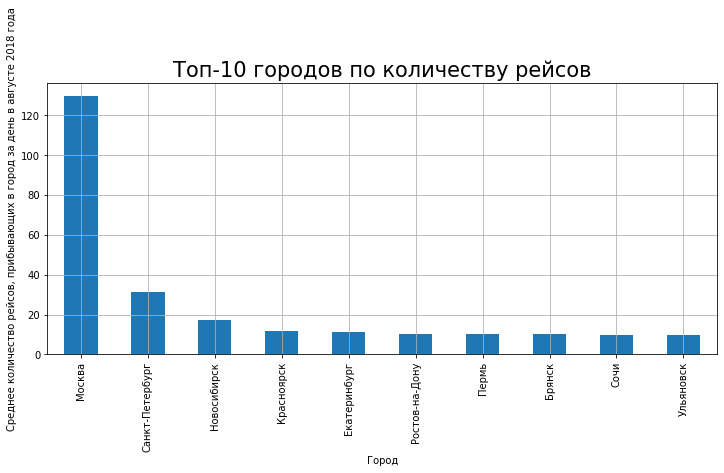

In [10]:
cities_stat.sort_values(by=['average_flights'], ascending = False).head(10).plot('city', 'average_flights', kind='bar', grid=True, figsize=(12, 5), legend=False)
plt.title('Топ-10 городов по количеству рейсов', fontsize=21)
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов, прибывающих в город за день в августе 2018 года')
plt.show()

По данной диаграмме еще раз наглядно видно, насколько велика доля Москвы в маршрутах авикомпании.

## 5. Общие выводы <a class="anchor" id="h_5"></a>
На основе проведенного анализа данных авиакомпании «F9», выбранных из БД, можно сделать следующие выводы:
1. Самолеты трех моделей являются лидерами по количеству перелетов:
    * Cessna 208 Caravan
    * Bombardier CRJ-200
    * Sukhoi SuperJet-100
   При этом самолетов Cessna 208 Caravan скорее всего меньше, чем Bombardier CRJ-200 и Sukhoi SuperJet-100, поскольку эти самолеты перевозят намного меньше пассажиров и предназначены для более коротких перелетов. Поэтому на них можно осуществлять большое количество рейсов.
2. Лидерами по количеству перелетов являются крупные города и региональные центры. На первом месте по количеству рейсов стоит город Москва.
3. Большое количество рейсов в Сочи осуществляется вследствие того, что данные взяты в разгар курортного сезона - за август месяц.
4. Компания регулярно осуществляет во все представленные в данных города минимум по одному рейсу в день.